In [1]:
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
library("pheatmap")
results="/sharedFolder/Results/Ligase4/commonOverallV2"
dir.create(results)
previousResults="/sharedFolder/Results/Hotspot/"
library("ggVennDiagram");
library("ggplot2")
library("vioplot")
hotspotLists1=as.character(rownames(read.table(paste(results,"/../rpmPlot/filtered/sortNames/_2_DMSO_TAZE.csv",sep=""),header=TRUE,row.names=1,sep=",")))
hotspotLists2=as.character(rownames(read.table(paste(results,"/../rpmPlot/filtered/sortNames/_5_DMSOVale.csv",sep=""),header=TRUE,row.names=1,sep=",")))
Database=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
groSeq="/sharedFolder/Results/SequencingV2/groSeq_2/"
gro=read.table(paste(groSeq,"groSeq_AID_Heatmap_count.csv",sep="/"),header=TRUE,row.names=1,sep=",")+0.000001
RNAseq="/sharedFolder/Results/SequencingV2/RNA-seq/"
RNA=read.table(paste(RNAseq,"/RNA_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=",")+0.000001
ATAC="/sharedFolder/Results/SequencingV2/Atacseq/"
Atac=read.table(paste(ATAC,"/AtacSeq_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=",")+0.000001
ACE="/sharedFolder/Results/SequencingV2/cutTagAce/"
Ace=read.table(paste(ACE,"/cutTagAce_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=",")+0.000001
HTGTS="/sharedFolder//Results/Ligase4/"
Htgts=read.table(paste(HTGTS,"/count_hgtgtsHeatmap.csv",sep=""),header=TRUE,row.names=1,sep=",")+0.000001

hotspotListsTAZE=as.character(unlist(read.table("/sharedFolder/Results/Ligase4/HotspotIDList/TazeFULL.csv",header=FALSE,sep=",")))
hotspotListsVALE=as.character(unlist(read.table("/sharedFolder/Results/Ligase4/HotspotIDList/ValeFULL.csv",header=FALSE,sep=",")))

hotspotListsTAZECOMMON=as.character(unlist(read.table("/sharedFolder/Results/Ligase4/HotspotIDList/TAZEcommon.csv",header=FALSE,sep=",")))
hotspotListsVALECOMMON=as.character(unlist(read.table("/sharedFolder/Results/Ligase4/HotspotIDList/VALEcommon.csv",header=FALSE,sep=",")))

Warning message in dir.create(results):
“'/sharedFolder/Results/Ligase4/commonOverallV2' already exists”
Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] "TOTAL NOT FILTERED"
[1] "Decreased Taze  63"
[1] "Increased Taze  187"
[1] "Decreased Vale  54"
[1] "Increased Vale  186"
[1] "Gro seq"
[1] "Taze"
[1] "Decreased  11"
[1] "Increased  175"
[1] "NA  64"
[1] "Consistency percentage  74.4"
[1] "Vale"
[1] "Decreased  28"
[1] "Increased  117"
[1] "NA  95"
[1] "Consistency percentage  60.4166666666667"
[1] "RNA seq"
[1] "Taze"
[1] "Decreased  10"
[1] "Increased  176"
[1] "NA  64"
[1] "Consistency percentage  74.4"
[1] "Vale"
[1] "Decreased  7"
[1] "Increased  176"
[1] "NA  57"
[1] "Consistency percentage  76.25"
[1] "Atac"
[1] "Taze"
[1] "Decreased  56"
[1] "Increased  35"
[1] "NA  159"
[1] "Consistency percentage  36.4"
[1] "Vale"
[1] "Decreased  42"
[1] "Increased  45"
[1] "NA  153"
[1] "Consistency percentage  36.25"
[1] "Ace"
[1] "Taze"
[1] "Decreased  11"
[1] "Increased  164"
[1] "NA  75"
[1] "Consistency percentage  70"
[1] "Vale"
[1] "Decreased  1"
[1] "Increased  172"
[1] "NA  67"
[1] "Consistency percentage  72.0833333333333"
  

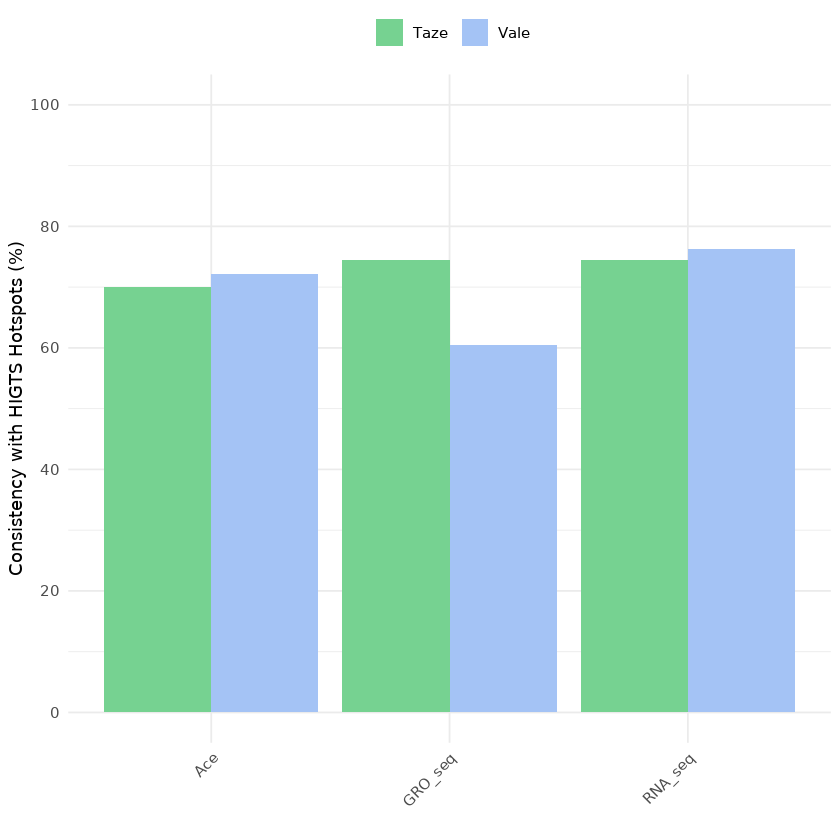

In [2]:
#TOTAL hotspot 
print("TOTAL NOT FILTERED")
conditions=c("groseq_Taze","atac_Taze","H3k27AC_Taze","Htgts_Taze","RNA_seq_Taze")
#HTGTS
Htgts2=Htgts[hotspotListsTAZE,]
htgtsTz=rep(0,nrow(Htgts2))
htgtsTz[which(Htgts2[,2]/Htgts2[,1]>=1)]=1

Htgts2=Htgts[hotspotListsVALE,]
htgtsVl=rep(0,nrow(Htgts2))
htgtsVl[which(Htgts2[,3]/Htgts2[,1]>=1)]=1

print(paste("Decreased Taze ",length(which(htgtsTz==0))))
print(paste("Increased Taze ",length(which(htgtsTz==1))))
print(paste("Decreased Vale ",length(which(htgtsVl==0))))
print(paste("Increased Vale ",length(which(htgtsVl==1))))
#GROSEQ

gro2=gro[hotspotListsTAZE,]
groTz=rep(0,nrow(gro2))
groTz[which(gro2[,2]/gro2[,1]>=1)]=1

gro2=gro[hotspotListsVALE,]
groVl=rep(0,nrow(gro2))
groVl[which(gro2[,3]/gro2[,1]>=1)]=1
print("Gro seq")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+groTz)==0))))
print(paste("Increased ",length(which((htgtsTz+groTz)==2))))
print(paste("NA ",length(which((htgtsTz+groTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+groTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+groVl)==0))))
print(paste("Increased ",length(which((htgtsVl+groVl)==2))))
print(paste("NA ",length(which((htgtsVl+groVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+groVl)!=1))/length(htgtsVl)*100))
#RNA
RNA2=RNA[hotspotListsTAZE,]
rnaTz=rep(0,nrow(RNA2))
rnaTz[which(RNA2[,2]/RNA2[,1]>=1)]=1

RNA2=RNA[hotspotListsVALE,]
rnaVl=rep(0,nrow(RNA2))
rnaVl[which(RNA2[,3]/RNA2[,1]>=1)]=1
print("RNA seq")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+rnaTz)==0))))
print(paste("Increased ",length(which((htgtsTz+rnaTz)==2))))
print(paste("NA ",length(which((htgtsTz+rnaTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+rnaTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+rnaVl)==0))))
print(paste("Increased ",length(which((htgtsVl+rnaVl)==2))))
print(paste("NA ",length(which((htgtsVl+rnaVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+rnaVl)!=1))/length(htgtsVl)*100))
#ATAC
Atac2=Atac[hotspotListsTAZE,]
atacTz=rep(0,nrow(Atac2))
atacTz[which(Atac2[,2]/Atac2[,1]>=1)]=1

Atac2=Atac[hotspotListsVALE,]
atacVl=rep(0,nrow(Atac2))
atacVl[which(Atac2[,3]/Atac2[,1]>=1)]=1
print("Atac")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+atacTz)==0))))
print(paste("Increased ",length(which((htgtsTz+atacTz)==2))))
print(paste("NA ",length(which((htgtsTz+atacTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+atacTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+atacVl)==0))))
print(paste("Increased ",length(which((htgtsVl+atacVl)==2))))
print(paste("NA ",length(which((htgtsVl+atacVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+atacVl)!=1))/length(htgtsVl)*100))
#Ace
Ace2=Ace[hotspotListsTAZE,]
aceTz=rep(0,nrow(Ace2))
aceTz[which(Ace2[,2]/Ace2[,1]>=1)]=1

Ace2=Ace[hotspotListsVALE,]
aceVl=rep(0,nrow(Ace2))
aceVl[which(Ace2[,3]/Ace2[,1]>=1)]=1
print("Ace")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+aceTz)==0))))
print(paste("Increased ",length(which((htgtsTz+aceTz)==2))))
print(paste("NA ",length(which((htgtsTz+aceTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+aceTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+aceVl)==0))))
print(paste("Increased ",length(which((htgtsVl+aceVl)==2))))
print(paste("NA ",length(which((htgtsVl+aceVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+aceVl)!=1))/length(htgtsVl)*100))

consistency_percentages <- data.frame(
  Consistency_with_HIGTS_Hotspots_Percentage = c(
    length(which((htgtsTz+groTz)!=1))/length(htgtsTz)*100,
    length(which((htgtsVl+groVl)!=1))/length(htgtsVl)*100,
    length(which((htgtsTz+rnaTz)!=1))/length(htgtsTz)*100,
    length(which((htgtsVl+rnaVl)!=1))/length(htgtsVl)*100,
    length(which((htgtsTz+aceTz)!=1))/length(htgtsTz)*100,
    length(which((htgtsVl+aceVl)!=1))/length(htgtsVl)*100
  ),
  Condition = rep(c("Taze", "Vale"), 3),
  Data_Type = rep(c("GRO_seq", "RNA_seq", "Ace"), each = 2)
)
print(consistency_percentages)
library(ggplot2)
colors <- c("Taze" = "#76d291", "Vale" = "#a4c3f5")  # Codici colore esadecimali

# Assumo che 'consistency_percentages' sia il tuo dataframe che contiene le percentuali
# di consistenza come calcolato nel tuo codice. Ora procediamo a creare il grafico.

# Trasformiamo il dataframe in formato lungo per utilizzarlo con ggplot2
long_data <- reshape2::melt(consistency_percentages, id.vars = c('Data_Type', 'Condition'))

# Generiamo il grafico a barre
p <- ggplot(long_data, aes(x = Data_Type, y = value, fill = Condition)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  scale_fill_manual(values = colors) +
  ylab("Consistency with HIGTS Hotspots (%)") +
  xlab("") +
  scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, by = 20)) + # Marcatori di 20 in 20
  theme_minimal() +
  theme(legend.title = element_blank(), 
        legend.position = "top",
        axis.text.x = element_text(angle = 45, hjust = 1))

# Visualizziamo il grafico
print(p)


[1] "COMMON NOT FILTERED"
[1] "Decreased Taze  36"
[1] "Increased Taze  109"
[1] "Decreased Vale  28"
[1] "Increased Vale  118"
[1] "Gro seq"
[1] "Taze"
[1] "Decreased  5"
[1] "Increased  105"
[1] "NA  35"
[1] "Consistency percentage  75.8620689655172"
[1] "Vale"
[1] "Decreased  12"
[1] "Increased  77"
[1] "NA  57"
[1] "Consistency percentage  60.958904109589"
[1] "RNA seq"
[1] "Taze"
[1] "Decreased  7"
[1] "Increased  105"
[1] "NA  33"
[1] "Consistency percentage  77.2413793103448"
[1] "Vale"
[1] "Decreased  12"
[1] "Increased  77"
[1] "NA  57"
[1] "Consistency percentage  80.8219178082192"
[1] "Atac"
[1] "Taze"
[1] "Decreased  31"
[1] "Increased  23"
[1] "NA  91"
[1] "Consistency percentage  37.2413793103448"
[1] "Vale"
[1] "Decreased  23"
[1] "Increased  31"
[1] "NA  92"
[1] "Consistency percentage  36.986301369863"
[1] "Ace"
[1] "Taze"
[1] "Decreased  3"
[1] "Increased  99"
[1] "NA  43"
[1] "Consistency percentage  70.3448275862069"
[1] "Vale"
[1] "Decreased  0"
[1] "Increased  115

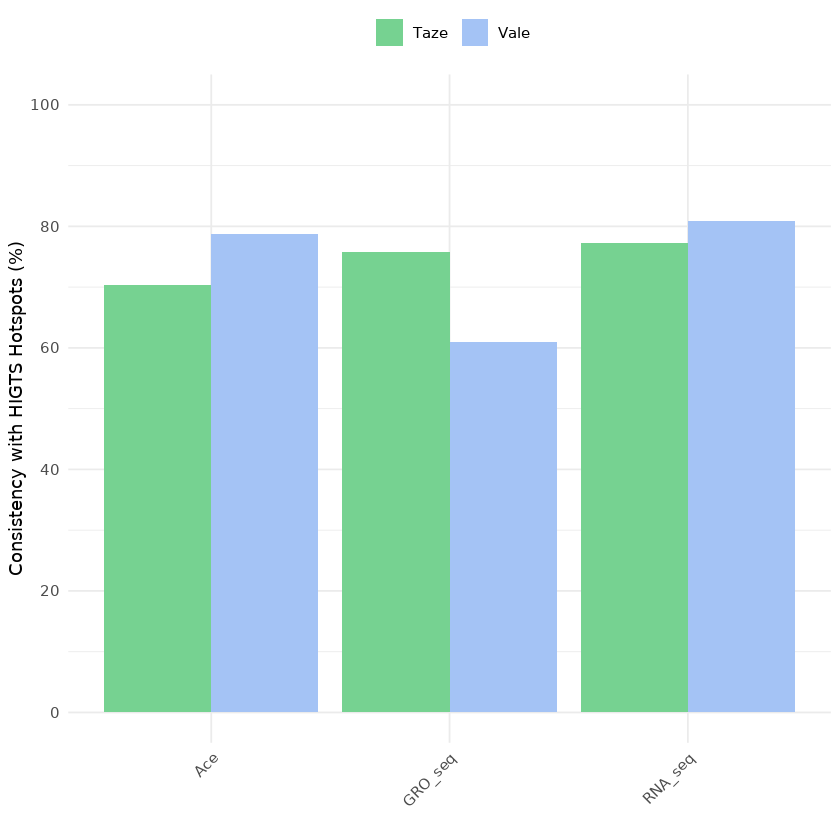

In [3]:
#COMMON HOTSPOT
print("COMMON NOT FILTERED")

#HTGTS
Htgts2=Htgts[hotspotListsTAZECOMMON,]
htgtsTz=rep(0,nrow(Htgts2))
htgtsTz[which(Htgts2[,2]/Htgts2[,1]>=1)]=1

Htgts2=Htgts[hotspotListsVALECOMMON,]
htgtsVl=rep(0,nrow(Htgts2))
htgtsVl[which(Htgts2[,3]/Htgts2[,1]>=1)]=1

print(paste("Decreased Taze ",length(which(htgtsTz==0))))
print(paste("Increased Taze ",length(which(htgtsTz==1))))
print(paste("Decreased Vale ",length(which(htgtsVl==0))))
print(paste("Increased Vale ",length(which(htgtsVl==1))))
#GROSEQ
gro2=gro[hotspotListsTAZECOMMON,]
groTz=rep(0,nrow(gro2))
groTz[which(gro2[,2]/gro2[,1]>=1)]=1

gro2=gro[hotspotListsVALECOMMON,]
groVl=rep(0,nrow(gro2))
groVl[which(gro2[,3]/gro2[,1]>=1)]=1
print("Gro seq")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+groTz)==0))))
print(paste("Increased ",length(which((htgtsTz+groTz)==2))))
print(paste("NA ",length(which((htgtsTz+groTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+groTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+groVl)==0))))
print(paste("Increased ",length(which((htgtsVl+groVl)==2))))
print(paste("NA ",length(which((htgtsVl+groVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+groVl)!=1))/length(htgtsVl)*100))
#RNA
RNA2=RNA[hotspotListsTAZECOMMON,]
rnaTz=rep(0,nrow(RNA2))
rnaTz[which(RNA2[,2]/RNA2[,1]>=1)]=1

RNA2=RNA[hotspotListsVALECOMMON,]
rnaVl=rep(0,nrow(RNA2))
rnaVl[which(RNA2[,3]/RNA2[,1]>=1)]=1
print("RNA seq")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+rnaTz)==0))))
print(paste("Increased ",length(which((htgtsTz+rnaTz)==2))))
print(paste("NA ",length(which((htgtsTz+rnaTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+rnaTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+groVl)==0))))
print(paste("Increased ",length(which((htgtsVl+groVl)==2))))
print(paste("NA ",length(which((htgtsVl+groVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+rnaVl)!=1))/length(htgtsVl)*100))
#ATAC
Atac2=Atac[hotspotListsTAZECOMMON,]
atacTz=rep(0,nrow(Atac2))
atacTz[which(Atac2[,2]/Atac2[,1]>=1)]=1

Atac2=Atac[hotspotListsVALECOMMON,]
atacVl=rep(0,nrow(Atac2))
atacVl[which(Atac2[,3]/Atac2[,1]>=1)]=1
print("Atac")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+atacTz)==0))))
print(paste("Increased ",length(which((htgtsTz+atacTz)==2))))
print(paste("NA ",length(which((htgtsTz+atacTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+atacTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+atacVl)==0))))
print(paste("Increased ",length(which((htgtsVl+atacVl)==2))))
print(paste("NA ",length(which((htgtsVl+atacVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+atacVl)!=1))/length(htgtsVl)*100))
#Ace
Ace2=Ace[hotspotListsTAZECOMMON,]
aceTz=rep(0,nrow(Ace2))
aceTz[which(Ace2[,2]/Ace2[,1]>=1)]=1

Ace2=Ace[hotspotListsVALECOMMON,]
aceVl=rep(0,nrow(Ace2))
aceVl[which(Ace2[,3]/Ace2[,1]>=1)]=1
print("Ace")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+aceTz)==0))))
print(paste("Increased ",length(which((htgtsTz+aceTz)==2))))
print(paste("NA ",length(which((htgtsTz+aceTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+aceTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+aceVl)==0))))
print(paste("Increased ",length(which((htgtsVl+aceVl)==2))))
print(paste("NA ",length(which((htgtsVl+aceVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+aceVl)!=1))/length(htgtsVl)*100))

consistency_percentages <- data.frame(
  Consistency_with_HIGTS_Hotspots_Percentage = c(
    length(which((htgtsTz+groTz)!=1))/length(htgtsTz)*100,
    length(which((htgtsVl+groVl)!=1))/length(htgtsVl)*100,
    length(which((htgtsTz+rnaTz)!=1))/length(htgtsTz)*100,
    length(which((htgtsVl+rnaVl)!=1))/length(htgtsVl)*100,
    length(which((htgtsTz+aceTz)!=1))/length(htgtsTz)*100,
    length(which((htgtsVl+aceVl)!=1))/length(htgtsVl)*100
  ),
  Condition = rep(c("Taze", "Vale"), 3),
  Data_Type = rep(c("GRO_seq", "RNA_seq", "Ace"), each = 2)
)
print(consistency_percentages)
library(ggplot2)
colors <- c("Taze" = "#76d291", "Vale" = "#a4c3f5")  # Codici colore esadecimali

# Assumo che 'consistency_percentages' sia il tuo dataframe che contiene le percentuali
# di consistenza come calcolato nel tuo codice. Ora procediamo a creare il grafico.

# Trasformiamo il dataframe in formato lungo per utilizzarlo con ggplot2
long_data <- reshape2::melt(consistency_percentages, id.vars = c('Data_Type', 'Condition'))

# Generiamo il grafico a barre
p <- ggplot(long_data, aes(x = Data_Type, y = value, fill = Condition)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  scale_fill_manual(values = colors) +
  ylab("Consistency with HIGTS Hotspots (%)") +
  xlab("") +
  scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, by = 20)) + # Marcatori di 20 in 20
  theme_minimal() +
  theme(legend.title = element_blank(), 
        legend.position = "top",
        axis.text.x = element_text(angle = 45, hjust = 1))

# Visualizziamo il grafico
print(p)


In [4]:
Database=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
groSeq="/sharedFolder/Results/SequencingV2/groSeq/"
gro=read.table(paste(groSeq,"groSeq_AID_Heatmap_count.csv",sep="/"),header=TRUE,row.names=1,sep=",")+0.000001
RNAseq="/sharedFolder/Results/SequencingV2/RNA-seq/"
RNA=read.table(paste(RNAseq,"/RNA_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=",")+0.000001
ATAC="/sharedFolder/Results/SequencingV2/Atacseq/"
Atac=read.table(paste(ATAC,"/AtacSeq_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=",")+0.000001
ACE="/sharedFolder/Results/SequencingV2/cutTagAce/"
Ace=read.table(paste(ACE,"/cutTagAce_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=",")+0.000001
HTGTS="/sharedFolder//Results/Ligase4/"
Htgts=read.table(paste(HTGTS,"/count_hgtgtsHeatmap.csv",sep=""),header=TRUE,row.names=1,sep=",")+0.000001
hotspotListsTAZEFILTERED=as.character(unlist(read.table("/sharedFolder/Results/Ligase4/HotspotIDList/TazeFiltered.csv",sep=",")))
hotspotListsVALEFILTERED=as.character(unlist(read.table("/sharedFolder/Results/Ligase4/HotspotIDList/ValeFiltered.csv",sep=",")))


hotspotListsTAZECOMMON=as.character(unlist(read.table("/sharedFolder/Results/Ligase4/HotspotIDList/TAZEcommonFiltered.csv",sep=",")))
hotspotListsVALECOMMON=as.character(unlist(read.table("/sharedFolder/Results/Ligase4/HotspotIDList/VALEcommonFiltered.csv",sep=",")))

In [5]:
#Filtered HOTSPOT
print("FILTERED")
#FIGURE 7 B
#HTGTS
Htgts2=Htgts[hotspotListsTAZEFILTERED,]
htgtsTz=rep(0,nrow(Htgts2))
htgtsTz[which(Htgts2[,2]/Htgts2[,1]>=1)]=1

Htgts2=Htgts[hotspotListsVALEFILTERED,]
htgtsVl=rep(0,nrow(Htgts2))
htgtsVl[which(Htgts2[,3]/Htgts2[,1]>=1)]=1

print(paste("Decreased Taze ",length(which(htgtsTz==0))))
print(paste("Increased Taze ",length(which(htgtsTz==1))))
print(paste("Decreased Vale ",length(which(htgtsVl==0))))
print(paste("Increased Vale ",length(which(htgtsVl==1))))
#GROSEQ
gro2=gro[hotspotListsTAZEFILTERED,]
groTz=rep(0,nrow(gro2))
groTz[which(gro2[,2]/gro2[,1]>=1)]=1

gro2=gro[hotspotListsVALEFILTERED,]
groVl=rep(0,nrow(gro2))
groVl[which(gro2[,3]/gro2[,1]>=1)]=1
print("Gro seq")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+groTz)==0))))
print(paste("Increased ",length(which((htgtsTz+groTz)==2))))
print(paste("NA ",length(which((htgtsTz+groTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+groTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+groVl)==0))))
print(paste("Increased ",length(which((htgtsVl+groVl)==2))))
print(paste("NA ",length(which((htgtsVl+groVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+groVl)!=1))/length(htgtsVl)*100))
#RNA
RNA2=RNA[hotspotListsTAZEFILTERED,]
rnaTz=rep(0,nrow(RNA2))
rnaTz[which(RNA2[,2]/RNA2[,1]>=1)]=1

RNA2=RNA[hotspotListsVALEFILTERED,]
rnaVl=rep(0,nrow(RNA2))
rnaVl[which(RNA2[,3]/RNA2[,1]>=1)]=1
print("RNA seq")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+rnaTz)==0))))
print(paste("Increased ",length(which((htgtsTz+rnaTz)==2))))
print(paste("NA ",length(which((htgtsTz+rnaTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+rnaTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+rnaVl)==0))))
print(paste("Increased ",length(which((htgtsVl+rnaVl)==2))))
print(paste("NA ",length(which((htgtsVl+rnaVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+rnaVl)!=1))/length(htgtsVl)*100))
#ATAC
Atac2=Atac[hotspotListsTAZEFILTERED,]
atacTz=rep(0,nrow(Atac2))
atacTz[which(Atac2[,2]/Atac2[,1]>=1)]=1

Atac2=Atac[hotspotListsVALEFILTERED,]
atacVl=rep(0,nrow(Atac2))
atacVl[which(Atac2[,3]/Atac2[,1]>=1)]=1
print("Atac")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+atacTz)==0))))
print(paste("Increased ",length(which((htgtsTz+atacTz)==2))))
print(paste("NA ",length(which((htgtsTz+atacTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+atacTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+atacVl)==0))))
print(paste("Increased ",length(which((htgtsVl+atacVl)==2))))
print(paste("NA ",length(which((htgtsVl+atacVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+atacVl)!=1))/length(htgtsVl)*100))
#Ace
Ace2=Ace[hotspotListsTAZEFILTERED,]
aceTz=rep(0,nrow(Ace2))
aceTz[which(Ace2[,2]/Ace2[,1]>=1)]=1

Ace2=Ace[hotspotListsVALEFILTERED,]
aceVl=rep(0,nrow(Ace2))
aceVl[which(Ace2[,3]/Ace2[,1]>=1)]=1
print("Ace")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+aceTz)==0))))
print(paste("Increased ",length(which((htgtsTz+aceTz)==2))))
print(paste("NA ",length(which((htgtsTz+aceTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+aceTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+aceVl)==0))))
print(paste("Increased ",length(which((htgtsVl+aceVl)==2))))
print(paste("NA ",length(which((htgtsVl+aceVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+aceVl)!=1))/length(htgtsVl)*100))

results_df <- data.frame(
  Condition = c("Decreased Taze", "Increased Taze", "Decreased Vale", "Increased Vale"),
  HTGTS = c(length(which(htgtsTz==0)), length(which(htgtsTz==1)), length(which(htgtsVl==0)), length(which(htgtsVl==1))),
  GRO_seq = c(length(which((htgtsTz+groTz)==0)), length(which((htgtsTz+groTz)==2)), length(which((htgtsVl+groVl)==0)), length(which((htgtsVl+groVl)==2))),
  RNA_seq = c(length(which((htgtsTz+rnaTz)==0)), length(which((htgtsTz+rnaTz)==2)), length(which((htgtsVl+rnaVl)==0)), length(which((htgtsVl+rnaVl)==2))),
  ATAC = c(length(which((htgtsTz+atacTz)==0)), length(which((htgtsTz+atacTz)==2)), length(which((htgtsVl+atacVl)==0)), length(which((htgtsVl+atacVl)==2))),
  Ace = c(length(which((htgtsTz+aceTz)==0)), length(which((htgtsTz+aceTz)==2)), length(which((htgtsVl+aceVl)==0)), length(which((htgtsVl+aceVl)==2)))
)

# Supponiamo che results_df sia strutturato come descritto in precedenza
# e che contenga i dati corretti.

# Creiamo un nuovo dataframe con le colonne desiderate
new_results_df <- data.frame(
  Taze = c(results_df$HTGTS[results_df$Condition == "Increased Taze"],
           results_df$GRO_seq[results_df$Condition == "Increased Taze"],
           results_df$RNA_seq[results_df$Condition == "Increased Taze"],
           results_df$ATAC[results_df$Condition == "Increased Taze"],
           results_df$Ace[results_df$Condition == "Increased Taze"],
           results_df$HTGTS[results_df$Condition == "Decreased Taze"],
           results_df$GRO_seq[results_df$Condition == "Decreased Taze"],
           results_df$RNA_seq[results_df$Condition == "Decreased Taze"],
           results_df$ATAC[results_df$Condition == "Decreased Taze"],
           results_df$Ace[results_df$Condition == "Decreased Taze"]),
  Vale = c(results_df$HTGTS[results_df$Condition == "Increased Vale"],
           results_df$GRO_seq[results_df$Condition == "Increased Vale"],
           results_df$RNA_seq[results_df$Condition == "Increased Vale"],
           results_df$ATAC[results_df$Condition == "Increased Vale"],
           results_df$Ace[results_df$Condition == "Increased Vale"],
           results_df$HTGTS[results_df$Condition == "Decreased Vale"],
           results_df$GRO_seq[results_df$Condition == "Decreased Vale"],
           results_df$RNA_seq[results_df$Condition == "Decreased Vale"],
           results_df$ATAC[results_df$Condition == "Decreased Vale"],
           results_df$Ace[results_df$Condition == "Decreased Vale"])
)

# Assegniamo i nomi alle righe per indicare se si tratta di 'Increased' o 'Decreased'
rownames(new_results_df) <- c("HTGTS_increased", "GRO_seq_increased", "RNA_seq_increased", "ATAC_increased", "Ace_increased",
                              "HTGTS_decreased", "GRO_seq_decreased", "RNA_seq_decreased", "ATAC_decreased", "Ace_decreased")
new_results_df=t(new_results_df)
# Visualizziamo il nuovo dataframe
print(new_results_df)

# Da qui, puoi continuare con la creazione del tuo grafico o con altre analisi utilizzando 'new_results_df'.
library(ggplot2)
library(dplyr)

# Dato che abbiamo già il nuovo dataframe trasformato 'new_results_df', procediamo con il ggplot
new_results_df <- t(new_results_df)
write.table(new_results_df,"data.csv",col.names=NA,sep=",")

[1] "FILTERED"
[1] "Decreased Taze  8"
[1] "Increased Taze  53"
[1] "Decreased Vale  11"
[1] "Increased Vale  43"
[1] "Gro seq"
[1] "Taze"
[1] "Decreased  1"
[1] "Increased  47"
[1] "NA  13"
[1] "Consistency percentage  78.6885245901639"
[1] "Vale"
[1] "Decreased  7"
[1] "Increased  35"
[1] "NA  12"
[1] "Consistency percentage  77.7777777777778"
[1] "RNA seq"
[1] "Taze"
[1] "Decreased  1"
[1] "Increased  49"
[1] "NA  11"
[1] "Consistency percentage  81.9672131147541"
[1] "Vale"
[1] "Decreased  2"
[1] "Increased  42"
[1] "NA  10"
[1] "Consistency percentage  81.4814814814815"
[1] "Atac"
[1] "Taze"
[1] "Decreased  7"
[1] "Increased  14"
[1] "NA  40"
[1] "Consistency percentage  34.4262295081967"
[1] "Vale"
[1] "Decreased  8"
[1] "Increased  9"
[1] "NA  37"
[1] "Consistency percentage  31.4814814814815"
[1] "Ace"
[1] "Taze"
[1] "Decreased  3"
[1] "Increased  49"
[1] "NA  9"
[1] "Consistency percentage  85.2459016393443"
[1] "Vale"
[1] "Decreased  0"
[1] "Increased  42"
[1] "NA  12"
[1] "C


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
#COMMON HOTSPOT
#FIGURE 7 I

print("FILTERED Common")

#HTGTS
Htgts2=Htgts[hotspotListsTAZECOMMON,]
htgtsTz=rep(0,nrow(Htgts2))
htgtsTz[which(Htgts2[,2]/Htgts2[,1]>=1)]=1

Htgts2=Htgts[hotspotListsVALECOMMON,]
htgtsVl=rep(0,nrow(Htgts2))
htgtsVl[which(Htgts2[,3]/Htgts2[,1]>=1)]=1

print(paste("Decreased Taze ",length(which(htgtsTz==0))))
print(paste("Increased Taze ",length(which(htgtsTz==1))))
print(paste("Decreased Vale ",length(which(htgtsVl==0))))
print(paste("Increased Vale ",length(which(htgtsVl==1))))



#GROSEQ
gro2=gro[hotspotListsTAZECOMMON,]
groTz=rep(0,nrow(gro2))
groTz[which(gro2[,2]/gro2[,1]>=1)]=1

gro2=gro[hotspotListsVALECOMMON,]
groVl=rep(0,nrow(gro2))
groVl[which(gro2[,3]/gro2[,1]>=1)]=1
print("Gro seq")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+groTz)==0))))
print(paste("Increased ",length(which((htgtsTz+groTz)==2))))
print(paste("NA ",length(which((htgtsTz+groTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+groTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+groVl)==0))))
print(paste("Increased ",length(which((htgtsVl+groVl)==2))))
print(paste("NA ",length(which((htgtsVl+groVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+groVl)!=1))/length(htgtsVl)*100))
#RNA
RNA2=RNA[hotspotListsTAZECOMMON,]
rnaTz=rep(0,nrow(RNA2))
rnaTz[which(RNA2[,2]/RNA2[,1]>=1)]=1

RNA2=RNA[hotspotListsVALECOMMON,]
rnaVl=rep(0,nrow(RNA2))
rnaVl[which(RNA2[,3]/RNA2[,1]>=1)]=1
print("RNA seq")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+rnaTz)==0))))
print(paste("Increased ",length(which((htgtsTz+rnaTz)==2))))
print(paste("NA ",length(which((htgtsTz+rnaTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+rnaTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+rnaVl)==0))))
print(paste("Increased ",length(which((htgtsVl+rnaVl)==2))))
print(paste("NA ",length(which((htgtsVl+rnaVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+rnaVl)!=1))/length(htgtsVl)*100))
#ATAC
Atac2=Atac[hotspotListsTAZECOMMON,]
atacTz=rep(0,nrow(Atac2))
atacTz[which(Atac2[,2]/Atac2[,1]>=1)]=1

Atac2=Atac[hotspotListsVALECOMMON,]
atacVl=rep(0,nrow(Atac2))
atacVl[which(Atac2[,3]/Atac2[,1]>=1)]=1
print("Atac")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+atacTz)==0))))
print(paste("Increased ",length(which((htgtsTz+atacTz)==2))))
print(paste("NA ",length(which((htgtsTz+atacTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+atacTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+atacVl)==0))))
print(paste("Increased ",length(which((htgtsVl+atacVl)==2))))
print(paste("NA ",length(which((htgtsVl+atacVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+atacVl)!=1))/length(htgtsVl)*100))
#Ace
Ace2=Ace[hotspotListsTAZECOMMON,]
aceTz=rep(0,nrow(Ace2))
aceTz[which(Ace2[,2]/Ace2[,1]>=1)]=1

Ace2=Ace[hotspotListsVALECOMMON,]
aceVl=rep(0,nrow(Ace2))
aceVl[which(Ace2[,3]/Ace2[,1]>=1)]=1
print("Ace")
print("Taze")
print(paste("Decreased ",length(which((htgtsTz+aceTz)==0))))
print(paste("Increased ",length(which((htgtsTz+aceTz)==2))))
print(paste("NA ",length(which((htgtsTz+aceTz)==1))))

print(paste("Consistency percentage ",length(which((htgtsTz+aceTz)!=1))/length(htgtsTz)*100))
print("Vale")
print(paste("Decreased ",length(which((htgtsVl+aceVl)==0))))
print(paste("Increased ",length(which((htgtsVl+aceVl)==2))))
print(paste("NA ",length(which((htgtsVl+aceVl)==1))))

print(paste("Consistency percentage ",length(which((htgtsVl+aceVl)!=1))/length(htgtsVl)*100))

results_df <- data.frame(
  Condition = c("Decreased Taze", "Increased Taze", "Decreased Vale", "Increased Vale"),
  HTGTS = c(length(which(htgtsTz==0)), length(which(htgtsTz==1)), length(which(htgtsVl==0)), length(which(htgtsVl==1))),
  GRO_seq = c(length(which((htgtsTz+groTz)==0)), length(which((htgtsTz+groTz)==2)), length(which((htgtsVl+groVl)==0)), length(which((htgtsVl+groVl)==2))),
  RNA_seq = c(length(which((htgtsTz+rnaTz)==0)), length(which((htgtsTz+rnaTz)==2)), length(which((htgtsVl+rnaVl)==0)), length(which((htgtsVl+rnaVl)==2))),
  ATAC = c(length(which((htgtsTz+atacTz)==0)), length(which((htgtsTz+atacTz)==2)), length(which((htgtsVl+atacVl)==0)), length(which((htgtsVl+atacVl)==2))),
  Ace = c(length(which((htgtsTz+aceTz)==0)), length(which((htgtsTz+aceTz)==2)), length(which((htgtsVl+aceVl)==0)), length(which((htgtsVl+aceVl)==2)))
)

# Supponiamo che results_df sia strutturato come descritto in precedenza
# e che contenga i dati corretti.

# Creiamo un nuovo dataframe con le colonne desiderate
new_results_df <- data.frame(
  Taze = c(results_df$HTGTS[results_df$Condition == "Increased Taze"],
           results_df$GRO_seq[results_df$Condition == "Increased Taze"],
           results_df$RNA_seq[results_df$Condition == "Increased Taze"],
           results_df$ATAC[results_df$Condition == "Increased Taze"],
           results_df$Ace[results_df$Condition == "Increased Taze"],
           results_df$HTGTS[results_df$Condition == "Decreased Taze"],
           results_df$GRO_seq[results_df$Condition == "Decreased Taze"],
           results_df$RNA_seq[results_df$Condition == "Decreased Taze"],
           results_df$ATAC[results_df$Condition == "Decreased Taze"],
           results_df$Ace[results_df$Condition == "Decreased Taze"]),
  Vale = c(results_df$HTGTS[results_df$Condition == "Increased Vale"],
           results_df$GRO_seq[results_df$Condition == "Increased Vale"],
           results_df$RNA_seq[results_df$Condition == "Increased Vale"],
           results_df$ATAC[results_df$Condition == "Increased Vale"],
           results_df$Ace[results_df$Condition == "Increased Vale"],
           results_df$HTGTS[results_df$Condition == "Decreased Vale"],
           results_df$GRO_seq[results_df$Condition == "Decreased Vale"],
           results_df$RNA_seq[results_df$Condition == "Decreased Vale"],
           results_df$ATAC[results_df$Condition == "Decreased Vale"],
           results_df$Ace[results_df$Condition == "Decreased Vale"])
)

# Assegniamo i nomi alle righe per indicare se si tratta di 'Increased' o 'Decreased'
rownames(new_results_df) <- c("HTGTS_increased", "GRO_seq_increased", "RNA_seq_increased", "ATAC_increased", "Ace_increased",
                              "HTGTS_decreased", "GRO_seq_decreased", "RNA_seq_decreased", "ATAC_decreased", "Ace_decreased")
new_results_df=t(new_results_df)
# Visualizziamo il nuovo dataframe
print(new_results_df)

# Da qui, puoi continuare con la creazione del tuo grafico o con altre analisi utilizzando 'new_results_df'.
library(ggplot2)
library(dplyr)

# Dato che abbiamo già il nuovo dataframe trasformato 'new_results_df', procediamo con il ggplot
new_results_df <- t(new_results_df)
write.table(new_results_df,"data.csv",col.names=NA,sep=",")

[1] "FILTERED Common"
[1] "Decreased Taze  2"
[1] "Increased Taze  22"
[1] "Decreased Vale  4"
[1] "Increased Vale  21"
[1] "Gro seq"
[1] "Taze"
[1] "Decreased  1"
[1] "Increased  19"
[1] "NA  4"
[1] "Consistency percentage  83.3333333333333"
[1] "Vale"
[1] "Decreased  2"
[1] "Increased  16"
[1] "NA  7"
[1] "Consistency percentage  72"
[1] "RNA seq"
[1] "Taze"
[1] "Decreased  0"
[1] "Increased  21"
[1] "NA  3"
[1] "Consistency percentage  87.5"
[1] "Vale"
[1] "Decreased  1"
[1] "Increased  21"
[1] "NA  3"
[1] "Consistency percentage  88"
[1] "Atac"
[1] "Taze"
[1] "Decreased  2"
[1] "Increased  9"
[1] "NA  13"
[1] "Consistency percentage  45.8333333333333"
[1] "Vale"
[1] "Decreased  3"
[1] "Increased  5"
[1] "NA  17"
[1] "Consistency percentage  32"
[1] "Ace"
[1] "Taze"
[1] "Decreased  1"
[1] "Increased  21"
[1] "NA  2"
[1] "Consistency percentage  91.6666666666667"
[1] "Vale"
[1] "Decreased  0"
[1] "Increased  21"
[1] "NA  4"
[1] "Consistency percentage  84"
     HTGTS_increased GRO_se

In [7]:
which((htgtsTz+groTz)==0)

[1] 11

In [8]:
htgtsTz

[1] 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1

In [9]:
htgtsTz

[1] 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1

In [10]:
Htgts2=Htgts[hotspotListsTAZECOMMON,]
htgtsTz=rep(0,nrow(Htgts2))
htgtsTz[which(Htgts2[,2]/Htgts2[,1]>=1)]=1

In [11]:
Htgts2

,Ligase4_KO_DMSO,Ligase4_KO_Taze,Ligase4_KO_Vale
,<dbl>,<dbl>,<dbl>
861,307.000001,475,508
779,217.000001,289,285
892,209.000001,294,311
819,164.000001,267,273
871,123.000001,290,233
792,104.000001,164,139
719,74.000001,127,141
837,68.000001,137,116
766,64.000001,27,50
